In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st

In [2]:
!ls /datasets/project_sql*

 /datasets/project_sql_result_01.csv	    /datasets/project_sql_result_04.csv
'/datasets/project_sql_result_01 new.csv'   /datasets/project_sql_result_05.csv
 /datasets/project_sql_result_02.csv	    /datasets/project_sql_result_06.csv
 /datasets/project_sql_result_03.csv	    /datasets/project_sql_result_07.csv


## Step 4. Exploratory data analysis

In [3]:
company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
location_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
location_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
location_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Data types are ok and no missing values in the tables

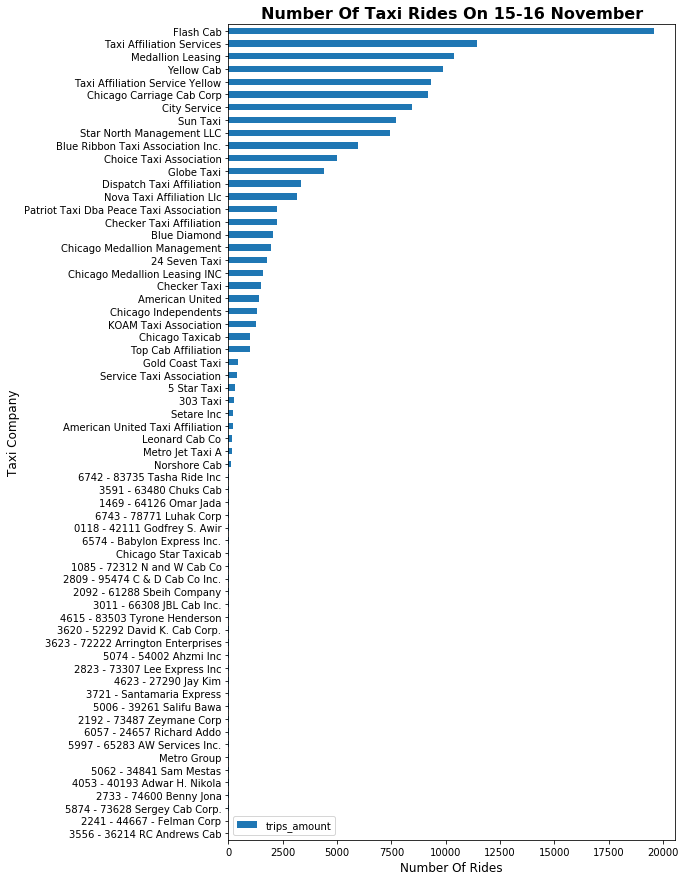

In [7]:
ax = company_trips.sort_values('trips_amount').plot(kind='barh'
                                               , x = 'company_name'
                                               , y = 'trips_amount'
                                               , figsize=(8,15))
ax.set_title('Number Of Taxi Rides On 15-16 November', fontweight='bold', fontsize=16)
ax.set_ylabel('Taxi Company', fontsize=12)
ax.set_xlabel('Number Of Rides', fontsize=12)
plt.show()

We can see that 'Flash Cab' is clear leader and there are more then half of the companies doing hardly any trips comparing to leaders. Let's look at it a bit more

In [8]:
company_trips.tail()

,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3
63,3556 - 36214 RC Andrews Cab,2


Though they are doing some rides

In [9]:
company_trips['trips_share'] = (company_trips['trips_amount'] / company_trips['trips_amount'].sum()).round(4)
company_trips.head()

,company_name,trips_amount,trips_share
0,Flash Cab,19558,0.1424
1,Taxi Affiliation Services,11422,0.0832
2,Medallion Leasing,10367,0.0755
3,Yellow Cab,9888,0.0720
4,Taxi Affiliation Service Yellow,9299,0.0677


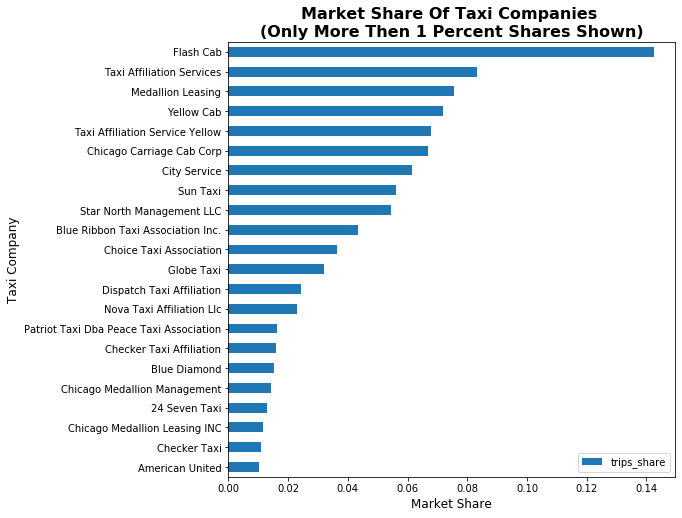

In [10]:
ax = company_trips.query('trips_share > 0.01').sort_values('trips_amount').plot(kind='barh'
                                               , x = 'company_name'
                                               , y = 'trips_share'
                                               , figsize=(8,8))
ax.set_title('Market Share Of Taxi Companies \n(Only More Then 1 Percent Shares Shown)', fontweight='bold', fontsize=16)
ax.set_ylabel('Taxi Company', fontsize=12)
ax.set_xlabel('Market Share', fontsize=12)
plt.show()

In [11]:
company_trips.query('trips_share > 0.01')['trips_share'].sum(), company_trips.query('trips_share > 0.01').shape[0]

(0.9461999999999999, 22)

Almost 95% of the trips were executed by 22 biggest taxi companies and just above 5 percent for the rest 42 companies

In [12]:
#just to be sure that sorting was good
location_trips.sort_values('average_trips', ascending=False, inplace=True)
location_trips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


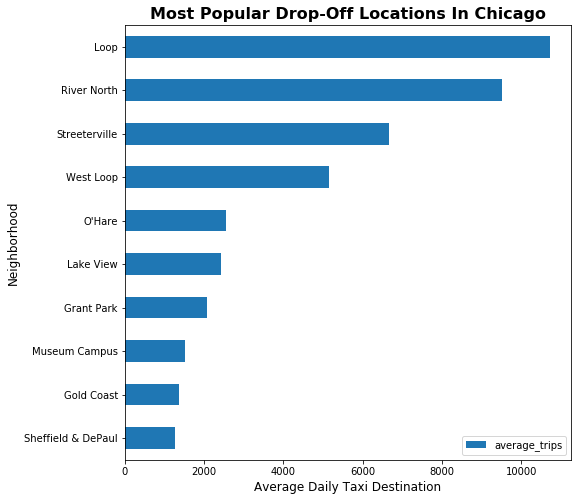

In [13]:
ax = location_trips.head(10).sort_values('average_trips').plot(kind='barh'
                                               , x = 'dropoff_location_name'
                                               , y = 'average_trips'
                                               , figsize=(8,8))
ax.set_title('Most Popular Drop-Off Locations In Chicago', fontweight='bold', fontsize=16)
ax.set_ylabel('Neighborhood', fontsize=12)
ax.set_xlabel('Average Daily Taxi Destination', fontsize=12)
plt.show()

Most of the popular drop-off locations in Chicago are downtown locations with numerious tourist's attractions, restaurants, clubs, offices and so on. No wonder they are on top of the list - people living/staying in different places but spent time in the downtown for lots of reasons. O'Hara airport being just on 5th place with significant gap to the top destinations tells us that airport has great public transport comunication so people not using taxi every time they go for a flight. 

## Step 5. Testing hypotheses 

In [14]:
airport_rides = pd.read_csv('/datasets/project_sql_result_07.csv')
airport_rides.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [15]:
airport_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [16]:
airport_rides['start_ts'] = pd.to_datetime(airport_rides['start_ts'])
airport_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Now it's good - no missing values,  times are in datetime format

In [17]:
airport_rides.weather_conditions.unique()

array(['Good', 'Bad'], dtype=object)

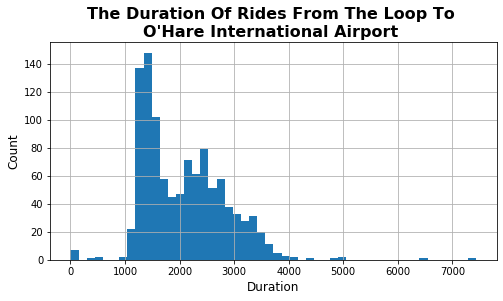

In [18]:
ax = airport_rides['duration_seconds'].hist(bins=50, figsize=(8,4))
ax.set_title('The Duration Of Rides From The Loop To \nO\'Hare International Airport ', fontweight='bold', fontsize=16)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Duration', fontsize=12)
plt.show()

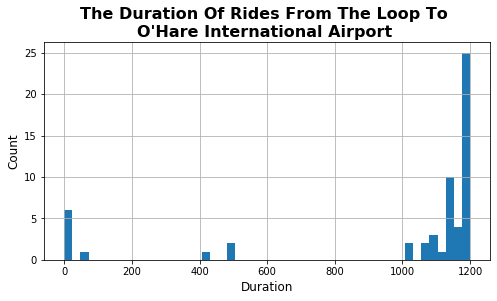

In [19]:
ax = airport_rides['duration_seconds'].hist(bins=50, figsize=(8,4), range=(0,1200))
ax.set_title('The Duration Of Rides From The Loop To \nO\'Hare International Airport ', fontweight='bold', fontsize=16)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Duration', fontsize=12)
plt.show()

We have some errors in the data. Considering that the distance from Loop to O'Hara airport is 17 miles it's impossible for taxi to reach it in less then 5 min and it's quite improbable to reach faster then 17 minutes. From the histograms we plot it's clear that the fastest real rides starts around 20 minutes. To be on the safe side we'll set a cutting point at 1000 secunds and declare that any rides faster then 1000 sec are mistakes of some kind (maybe it was canceled but not deleted from the system or wrong locations or anything else) and we'll get rid of them. <br>
We also have some extra long rides. They could be a real trips if for instance they included some waiting time or accident on the road.

In [20]:
airport_rides = (airport_rides
                 .drop(airport_rides.query('duration_seconds < 1000').index)
                 .reset_index(drop=True))
airport_rides.shape

(1058, 3)

In [21]:
airport_rides.query('duration_seconds > 5000').shape

(2, 3)

There are just two extreamly long rides and this kind of events hardly depends on the weather but could play a bad trick with the average timing. Thus we'll remove them as outliers.

In [22]:
airport_rides = (airport_rides
                 .drop(airport_rides.query('duration_seconds > 5000')
                       .index).reset_index(drop=True))
airport_rides.shape

(1056, 3)

In [23]:
airport_rides.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


#### We were asked to test the hypothesis:
#### "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

To do so we formulate:
H0: The average duration of rides from the Loop to O'Hare International Airport stays the same on rainy Saturdays
H1: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays
This is not the question of life and death so appropriate level of confidence is 95%
Now let's see if we can reject the null hypothesis with our data.

In [24]:
alpha = 0.05

In [25]:
good_data = airport_rides.query('weather_conditions == "Good"')['duration_seconds']
rainy_data = airport_rides.query('weather_conditions == "Bad"')['duration_seconds']
good_data.shape, rainy_data.shape

((878,), (178,))

Both samples are well above 30 level thus we may use ttest without checking the data for normality

In this case we may suggest that the variance of our samples should be the same but to be on the safe side we'll do the Levene test before proceeding to testing our hypothesis

In [26]:
lev_result = st.levene(good_data, rainy_data, center='mean')
lev_result

LeveneResult(statistic=0.7738053730972893, pvalue=0.37924290894835877)

The Levene test results tells us that there is no reasons to reject our common sense suggestion of equality of the variances. <br>
Thus we'll set equal_var parameter to True

In [27]:
results = st.ttest_ind(good_data, rainy_data, equal_var=True)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  3.3103188946127685e-14
We reject the null hypothesis


With the p-value so low we are quite confident that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## Overall conclusions

In this project we explored the data of taxi rides in Chicago. We were provided the datasets for November 2017. 
- We discovered that just 22 taxi companies cover almost 95% of the total trips
- We detected top 10 drop-off destinations for taxi rides
- After removing some outliers and possible errors we confirmed almost surely the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.